# 逻辑回归-线性不可分
案例：设想你是工厂的主管，你要决定芯片要被接受或抛弃
数据集：ex2data.txt，芯片在两次测试中的测试结果

## 1.数据可视化

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'ex2data2.txt'
data = pd.read_csv(path,names=['Test 1','Test 2','Accepted'])
data.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


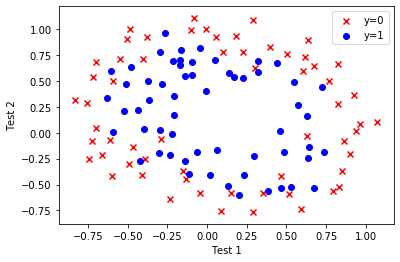

In [3]:
frg,ax = plt.subplots()
ax.scatter(data[data['Accepted']==0]['Test 1'],data[data['Accepted']==0]['Test 2'],c='r',marker='x',label='y=0')
ax.scatter(data[data['Accepted']==1]['Test 1'],data[data['Accepted']==1]['Test 2'],c='b',marker='o',label='y=1')
ax.legend()
ax.set(xlabel = 'Test 1',ylabel = 'Test 2')
plt.show()

## 2.特征映射

In [4]:
def feature_map(x1,x2,power):
    data = {}
    for i in np.arange(power+1):#当前两个参数的总幂次
        for j in np.arange(i+1):#x2的幂次
            data['F{}{}'.format(i-j,j)] = np.power(x1,i-j)*np.power(x2,j)#字典data的键是x1，x2对应的幂次
    return pd.DataFrame(data)

In [5]:
x1 = data['Test 1']
x2 = data['Test 2']
data2 = feature_map(x1,x2,6)
data2.head()

,F00,F10,F01,F20,F11,F02,F30,F21,F12,F03,...,F23,F14,F05,F60,F51,F42,F33,F24,F15,F06
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


## 3. 损失函数

   ### 3.1构造数据集

In [6]:
X = data2.values
X.shape

(118, 28)

In [7]:
y_ = data.iloc[:,-1].values
y = y_.reshape(len(y_),1)
y.shape

(118, 1)

In [8]:
#sigmoid函数
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [9]:
def costfunction(X,y,theta,lmd):
    u = sigmoid(X@theta)#先把sigmoid函数项算出来
    first = y * np.log(u)
    second = (1-y) * np.log(1-u)
    reg = np.sum(np.power(theta[1:],2))*(lmd/(2*len(X))) #正则化项
    
    return -(np.sum(first + second))/len(X)

In [10]:
theta = np.zeros((28,1))
theta.shape

(28, 1)

### 3.2初始代价

In [11]:
lmd = 1
cost_init = costfunction(X,y,theta,lmd)
print(cost_init)

0.6931471805599454


## 4.梯度下降函数

In [12]:
def gradientDescent(X,y,theta,iters,alpha,lmd):
    m = len(X)
    costs = []
    
    for i in range(iters):
        reg = theta[1:]*(lmd/len(X))
        reg = np.insert(reg,0,values=0,axis=0)#构造lmd
        A = sigmoid(X@theta)
        theta  = theta -(alpha/m)  * X.T @ (A - y) - reg
        cost = costfunction(X,y,theta,lmd)
        costs.append(cost)
        if i % 10000 == 0:
            print(cost)
            
    return costs,theta

In [13]:
alpha = 0.05
iters = 200000
lmd =0.001

In [14]:
costs,theta_final= gradientDescent(X,y,theta,iters,alpha,lmd)

0.6925093776557957
0.35918098722105457
0.3434294117866742
0.33771763363115903
0.33453694868902756
0.33243817888203114
0.33093243072990336
0.3297974843715417
0.3289136012178156
0.3282090554248433
0.3276376236477587
0.3271678621569052
0.3267774770996614
0.32645014383869464
0.326173599969031
0.3259384438521681
0.32573734548865846
0.3255645098339747
0.3254153009909567
0.3252859725193113


In [15]:
print(theta_final)

[[ 3.59339059]
 [ 2.17674304]
 [ 4.20132789]
 [-5.19356077]
 [-5.64217886]
 [-6.1548111 ]
 [ 1.52318405]
 [-0.93828001]
 [ 0.97591262]
 [-1.63373454]
 [-4.11045511]
 [ 2.11007071]
 [-2.88658964]
 [-2.03560892]
 [-4.39051201]
 [-1.22539985]
 [-0.49458398]
 [ 2.80958731]
 [-2.54535618]
 [-2.61928757]
 [ 1.34047574]
 [-4.23971724]
 [ 0.96442584]
 [-0.90062253]
 [ 1.67129629]
 [-2.67885148]
 [-2.36176568]
 [-0.22367976]]


## 5.预测函数

In [16]:
def predict(X,theta):
    prob = sigmoid(X@theta)
    return [1 if x>=0.5 else 0 for x in prob]

In [17]:
#准确率
y_ = np.array(predict(X,theta_final))
y_pre = y_.reshape(len(y_),1)
acc = np.mean(y_pre == y)#相同返回1，不同返回0
print('{0}%'.format(acc*100))

83.89830508474576%


## 6.绘制决策曲线

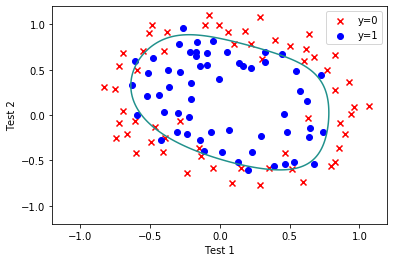

In [18]:
x = np.linspace(-1.2,1.2,200)
xx,yy = np.meshgrid(x,x)
z = feature_map(xx.ravel(),yy.ravel(),6).values
zz = z @ theta_final
zz = zz.reshape(xx.shape)
frg,ax = plt.subplots()
ax.scatter(data[data['Accepted']==0]['Test 1'],data[data['Accepted']==0]['Test 2'],c='r',marker='x',label='y=0')
ax.scatter(data[data['Accepted']==1]['Test 1'],data[data['Accepted']==1]['Test 2'],c='b',marker='o',label='y=1')
ax.legend()
ax.set(xlabel = 'Test 1',ylabel = 'Test 2')
plt.contour(xx,yy,zz,0)
plt.show()

## 7.改变lmd的值，观察决策曲线

0.6925093776557957
0.6453161109205869
0.6453161109205869
0.6453161109205869
0.6453161109205869
0.6453161109205869
0.6453161109205869
0.6453161109205869
0.6453161109205869
0.6453161109205869
0.6453161109205869
0.6453161109205869
0.6453161109205869
0.6453161109205869
0.6453161109205869
0.6453161109205869
0.6453161109205869
0.6453161109205869
0.6453161109205869
0.6453161109205869


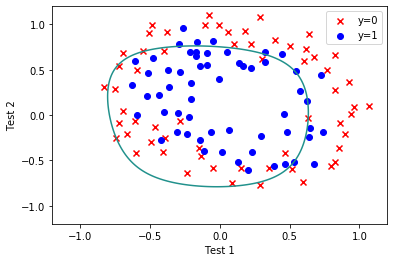

In [19]:
lmd =1 #欠拟合

costs,theta_final = gradientDescent(X,y,theta,iters,alpha,lmd)

x = np.linspace(-1.2,1.2,200)
xx,yy = np.meshgrid(x,x)
z = feature_map(xx.ravel(),yy.ravel(),6).values
zz = z @ theta_final
zz = zz.reshape(xx.shape)
frg,ax = plt.subplots()
ax.scatter(data[data['Accepted']==0]['Test 1'],data[data['Accepted']==0]['Test 2'],c='r',marker='x',label='y=0')
ax.scatter(data[data['Accepted']==1]['Test 1'],data[data['Accepted']==1]['Test 2'],c='b',marker='o',label='y=1')
ax.legend()
ax.set(xlabel = 'Test 1',ylabel = 'Test 2')
plt.contour(xx,yy,zz,0)
plt.show()

0.6925093776557957
0.3566918599011422
0.34041904701126446
0.33427464345333874
0.33058972275469806
0.3279464202695565
0.32589166819943177
0.32422268295126844
0.3228271818991202
0.32163464808127057
0.3205973887461718
0.31968162328519145
0.318862664320743
0.31812205114767184
0.3174457295529275
0.31682284132730903
0.3162448911334145
0.31570515772931906
0.3151982690801854
0.3147198905116462


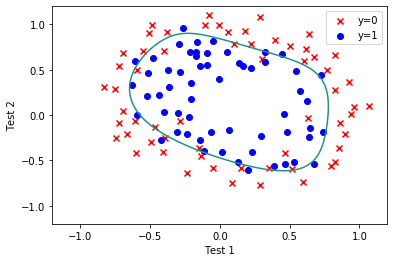

In [20]:
lmd = 0

costs,theta_final = gradientDescent(X,y,theta,iters,alpha,lmd)

x = np.linspace(-1.2,1.2,200)
xx,yy = np.meshgrid(x,x)
z = feature_map(xx.ravel(),yy.ravel(),6).values
zz = z @ theta_final
zz = zz.reshape(xx.shape)
frg,ax = plt.subplots()
ax.scatter(data[data['Accepted']==0]['Test 1'],data[data['Accepted']==0]['Test 2'],c='r',marker='x',label='y=0')
ax.scatter(data[data['Accepted']==1]['Test 1'],data[data['Accepted']==1]['Test 2'],c='b',marker='o',label='y=1')
ax.legend()
ax.set(xlabel = 'Test 1',ylabel = 'Test 2')
plt.contour(xx,yy,zz,0)
plt.show()